In [1]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
%matplotlib inline

### Engineered Distribution Demo

In [11]:
def make_feature_dist(kind, size, rs):

    dist = rs.uniform(0, 0.5, size)
    
    d = kind * 4
    
    for i in range(4):
        
        if i < 1 or i > 2:
            dist[d+i] += 0.2
        else:
            dist[d+i] += 0.5
    
    return dist

def average_dist(iterations, size, rs):

    avg_dist = np.zeros(size)
    
    for i in range(iterations):
        dist = make_feature_dist(i%4, size, rs)
        avg_dist = avg_dist + dist
    
    return avg_dist/iterations

In [12]:
rs  = np.random.RandomState(123)

In [13]:
dist = make_feature_dist(0, 16, rs)
dist = np.expand_dims(dist, axis=1)
dist

array([[0.54823459],
       [0.64306967],
       [0.61342573],
       [0.47565738],
       [0.35973448],
       [0.21155323],
       [0.4903821 ],
       [0.34241487],
       [0.24046595],
       [0.19605876],
       [0.17158901],
       [0.36452485],
       [0.21928612],
       [0.02983895],
       [0.19902213],
       [0.3689977 ]])

In [14]:
avg = average_dist(1000,16, rs)

Text(0.5, 0, 'Vector Index')

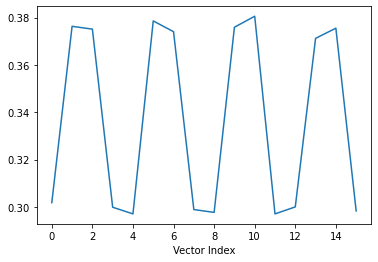

In [15]:
plt.plot(avg)
plt.xlabel('Vector Index')

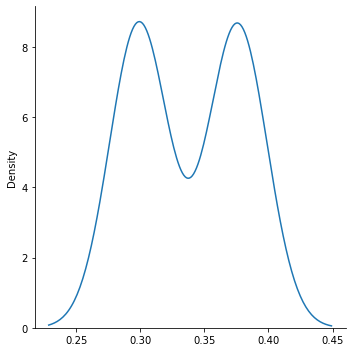

In [16]:
sns.displot(avg, kind="kde")

In [10]:
rs.randint(1,5, 10)

array([1, 3, 2, 3, 3, 4, 3, 4, 4, 2])

### Evaluate Normal Run

In [120]:
mean_reward           = []
ep_avg_ctr_mean       = []
ep_avg_ctr_mean_std   = []

t_mean_reward         = []
t_ep_avg_ctr_mean     = []
t_ep_avg_ctr_mean_std = []

test = False

lines = 0

tg = []

with open("./out_custom.txt") as f:
    content = f.read().splitlines()
    
for line in content:
    lines += 1
    
    if test:
        if "using" in line:
            t_mean_reward.append(float(line[-7:]))

        if "ep_avg_ctr" in line:
            i = line.find("mean = ")
            t_ep_avg_ctr_mean.append(float(line[i+7:i+7+14]))
            i = line.find("std = ")
            t_ep_avg_ctr_mean_std.append(float(line[i+6:]))
        
    else:
        if "using" in line:
            mean_reward.append(float(line[-7:]))

        if "ep_avg_ctr" in line:
            i = line.find("mean = ")
            ep_avg_ctr_mean.append(float(line[i+7:i+7+14]))
            i = line.find("std = ")
            ep_avg_ctr_mean_std.append(float(line[i+6:]))
        
    test = not test

print(lines)

19346


[0.11783570148859654,
 0.09565954707450848,
 0.0766433609344953,
 0.10890126925882668,
 0.13684875893108764,
 0.10278826315346176,
 0.12392491491199566,
 0.14112751074699423,
 0.10313308266108465,
 0.0992529221633365,
 0.13932754320175392,
 0.11777626685928387,
 0.1269350479407717,
 0.10060889490955476,
 0.09372197229359824,
 0.12199809389661376,
 0.11848764301305684,
 0.14749447895190482,
 0.11331040321804199,
 0.10612795909304677,
 0.12110048550443633,
 0.09273650321939189,
 0.10721381791743942,
 0.11024280476089998,
 0.14585982231297698,
 0.13806141927027718,
 0.1370845787945589,
 0.14200894398744793,
 0.12156249224841754,
 0.12825717819996738,
 0.08293218362362124,
 0.12009673794271795,
 0.08986698974706242,
 0.14538075066319622,
 0.11557511907347474,
 0.12805336746658066,
 0.12655267362650735,
 0.10902328064993912,
 0.11075595678862912,
 0.07760158957904201,
 0.11464967279423767,
 0.13843250576543908,
 0.10899716073894906,
 0.1466074625037162,
 0.09962352208046879,
 0.136890897583

Text(0.5, 0, 'Mean reward')

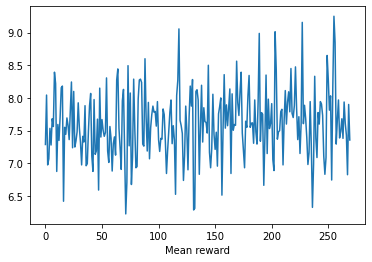

In [123]:
plt.plot(mean_reward)
plt.xlabel('Mean reward')

Text(0.5, 0, 'Avg CTR')

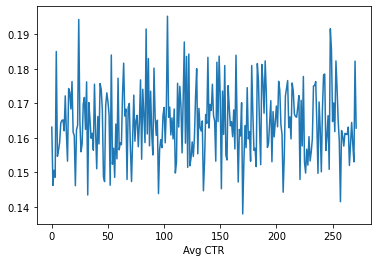

In [124]:
plt.plot(ep_avg_ctr_mean)
plt.xlabel('Avg CTR')

Text(0.5, 0, 'Avg CTR STD')

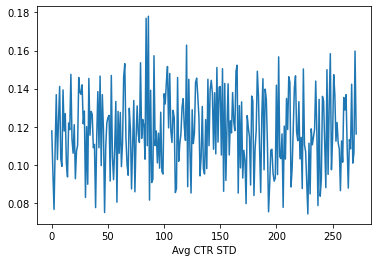

In [125]:
plt.plot(ep_avg_ctr_mean_std)
plt.xlabel('Avg CTR STD')

Text(0.5, 0, 'Test Mean Reward')

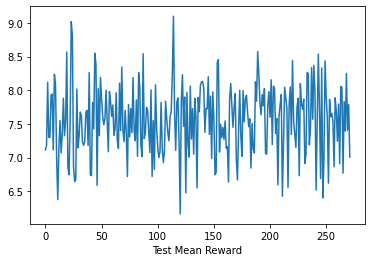

In [126]:
plt.plot(t_mean_reward)
plt.xlabel('Test Mean Reward')

0.203397475486

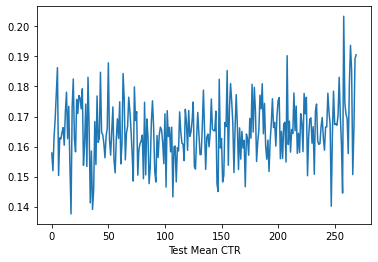

In [130]:
plt.plot(t_ep_avg_ctr_mean)
plt.xlabel('Test Mean CTR')

max_custom = max(t_ep_avg_ctr_mean)
max_custom

Text(0.5, 0, 'Test Mean CTR STD')

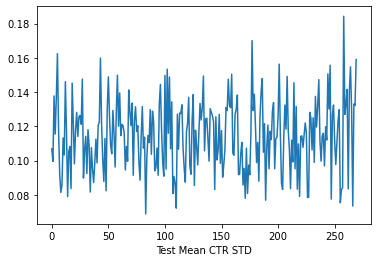

In [128]:

plt.plot(t_ep_avg_ctr_mean_std)
plt.xlabel('Test Mean CTR STD')